In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train_dir = r'E:\DATA\train'
validation_dir = r'E:\DATA\validation'
test_dir = r'E:\DATA\test'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                       input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
from tensorflow.keras import optimizers 

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr= 0.0001),
             metrics=['acc'])

In [11]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 20,
                             validation_data = validation_generator,
                             validation_steps = 50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 86s 864ms/step - loss: 0.6953 - acc: 0.5235 - val_loss: 0.6804 - val_acc: 0.5740
Epoch 2/20
100/100 [==============================] - 61s 612ms/step - loss: 0.6598 - acc: 0.6135 - val_loss: 0.6379 - val_acc: 0.6280
Epoch 3/20
100/100 [==============================] - 65s 649ms/step - loss: 0.6152 - acc: 0.6560 - val_loss: 0.6422 - val_acc: 0.6050
Epoch 4/20
100/100 [==============================] - 53s 532ms/step - loss: 0.5682 - acc: 0.7010 - val_loss: 0.6050 - val_acc: 0.6550
Epoch 5/20
100/100 [==============================] - 56s 563ms/step - loss: 0.5424 - acc: 0.7235 - val_loss: 0.6513 - val_acc: 0.6380
Epoch 6/20
100/100 [==============================] - 56s 561ms/step - loss: 0.5213 - acc: 0.7440 - val_loss: 0.6594 - val_acc: 0.6510
Epoch 7/20
100/100 [==============================] - 57s 572ms/step - loss: 0.4990 - acc: 0.7625 - val_loss: 0.57

<function matplotlib.pyplot.show(close=None, block=None)>

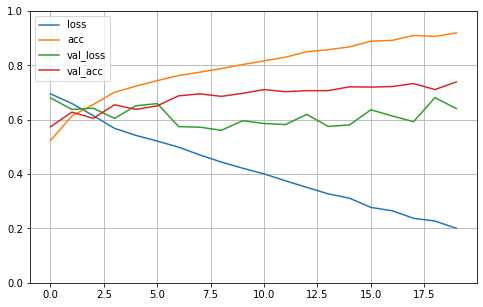

In [12]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [13]:
model.save('CNN_PROJECT.h5')

In [14]:
from tensorflow.keras import backend as k 
k.clear_session()
del model

# DATA AUGMENTATION

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                   target_size = (150,150),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                       input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [17]:
from tensorflow.keras import optimizers 

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr= 0.0001),
             metrics=['acc'])

In [18]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 20,
                             validation_data = validation_generator,
                             validation_steps = 50)

Epoch 1/20
100/100 [==============================] - 74s 736ms/step - loss: 0.6953 - acc: 0.5163 - val_loss: 0.6848 - val_acc: 0.5761
Epoch 2/20
100/100 [==============================] - 73s 727ms/step - loss: 0.6829 - acc: 0.5628 - val_loss: 0.6643 - val_acc: 0.6076
Epoch 3/20
100/100 [==============================] - 73s 735ms/step - loss: 0.6728 - acc: 0.5773 - val_loss: 0.6632 - val_acc: 0.5958
Epoch 4/20
100/100 [==============================] - 73s 733ms/step - loss: 0.6620 - acc: 0.5994 - val_loss: 0.6432 - val_acc: 0.6179
Epoch 5/20
100/100 [==============================] - 74s 737ms/step - loss: 0.6428 - acc: 0.6351 - val_loss: 0.6268 - val_acc: 0.6383
Epoch 6/20
100/100 [==============================] - 73s 729ms/step - loss: 0.6270 - acc: 0.6566 - val_loss: 0.6569 - val_acc: 0.6031
Epoch 7/20
100/100 [==============================] - 73s 730ms/step - loss: 0.6183 - acc: 0.6534 - val_loss: 0.5822 - val_acc: 0.6881
Epoch 8/20
100/100 [==============================] - 7

<function matplotlib.pyplot.show(close=None, block=None)>

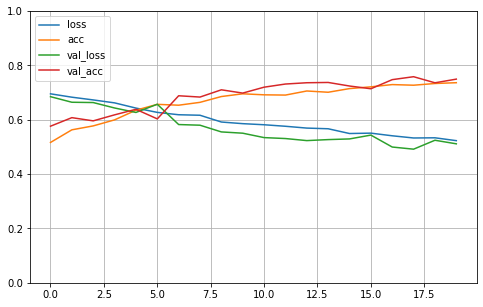

In [19]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

# Transfer Learning VGG16

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (150,150,3))

58892288/58889256 [==============================] - 24s 0us/step


In [23]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [24]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras import optimizers 

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

In [28]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_PROJECT_Model-{epoch:02d}.h5")

In [ ]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 30,
                             validation_data = validation_generator,
                             validation_steps = 50,
                             callbacks=[checkpoint_cb])

Epoch 1/30
 16/100 [===>..........................] - ETA: 8:55 - loss: 0.6981 - acc: 0.5625

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [ ]:
hist_df = pd.Dataframe(history.history)

In [ ]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')


In [ ]:
model.evaluate_generator(test_generator, steps = 50)